# Analyzing the Data Breaches

## Objective: 
Analyze patterns in data breaches and investigate historic data breaches to help surface potential loopholes that would help restrategize data centre security systems.

## Assumptions:
<p>

<li> Assuming the sector of company to be domain specific (industry) and thus just keeping one sector for one company
<li> The data breach incidents occured in the same time period as mentioned in the story

## About the data
<p>
This is a data breach information over the years for various organizations that includes the intensity of loss, methods deployed as well as Sources that reported these breaches. This data aids to analyze and investigate historic data breaches to help surface potential loopholes that would help restrategize data centre security systems.
    

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics

In [2]:
# Load the data
df = pd.read_csv('Data Breaches - Raw Data.csv')
df.head(2)

,Entity,alternative name,records lost,YEAR,story,SECTOR,METHOD,interesting story,DATA SENSITIVITY,DISPLAYED RECORDS,Unnamed: 10,source name,1st source link,2nd source link
0,NaN,NaN,NaN,year story broke,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN,NaN
1,US Customs and Border Protection,NaN,"100,000",2019,June 2019. Photos of travellers' faces and lic...,government,hacked,y,2,NaN,NaN,Washington Post,https://www.washingtonpost.com/technology/2019...,NaN


## Part A: Data Description

* **Entity** (String): name of the organization (public or private) that had the breach.
* **Alternative Name** (String): other known names of the entity.
* **Story** (String): tells a summary of what happened.
* **Year** (Date): year of the breach.
* **Records Lost** (Integer) : number of records that the breach compromised.
* **Sector** (String): organization's main sector (or field of business). 
* **Data Sensitivity** (String): It tells about the sensitity level of the data lost. 
* **Method** (String): main cause of the breach. 
* **1st source (link)** (String): 1st. url with more info about the breach. 
* **2nd source (link)** (String): 2nd. url with more info about the breach. 
* **Source name** (String): name of the source of news, official reports, blog, etc. included. Note that some of them have changed after I replaced some previous broken links that the original dataset had.

## Part B: Data Cleansing and Validation

In [3]:
# Removing the first row as it contains metadata
df = df[1:]

In [4]:
# Concise summary of data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 1 to 339
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             339 non-null    object 
 1   alternative name   136 non-null    object 
 2   records lost       338 non-null    object 
 3   YEAR               339 non-null    object 
 4   story              339 non-null    object 
 5   SECTOR             339 non-null    object 
 6   METHOD             339 non-null    object 
 7   interesting story  69 non-null     object 
 8   DATA SENSITIVITY   339 non-null    object 
 9   DISPLAYED RECORDS  32 non-null     object 
 10  Unnamed: 10        0 non-null      float64
 11  source name        339 non-null    object 
 12  1st source link    339 non-null    object 
 13  2nd source link    32 non-null     object 
dtypes: float64(1), object(13)
memory usage: 37.2+ KB


In [5]:
# Checking missing values in different columns
df.isnull().sum()

Entity                 0
alternative name     203
records lost           1
YEAR                   0
story                  0
SECTOR                 0
METHOD                 0
interesting story    270
DATA SENSITIVITY       0
DISPLAYED RECORDS    307
Unnamed: 10          339
source name            0
1st source link        0
2nd source link      307
dtype: int64

Dropping columns which I am not using for analysis as there aren't enough records for analysis

In [6]:
# Removing columns like - 'alternative name','unnamed', '1st source link', '2nd source link'
df = df.drop(['alternative name','Unnamed: 10', '1st source link', '2nd source link','interesting story', 'DISPLAYED RECORDS'], axis = 1)

# Let's look at our data now
df.head()

,Entity,records lost,YEAR,story,SECTOR,METHOD,DATA SENSITIVITY,source name
1,US Customs and Border Protection,"100,000",2019,June 2019. Photos of travellers' faces and lic...,government,hacked,2,Washington Post
2,Click2Gov,"300,000",2018,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,3,Fortune
3,SingHealth,"1,500,000",2018,July 2018. Hackers stole personal details of 1...,healthcare,hacked,4,Straits Times
4,Quest Diagnostics,"11,900,000",2019,June 2019. One of the biggest blood testing pr...,healthcare,poor security,4,NBC News
5,Australian National University,"200,000",2019,June 2019. A hacker accessed personal informat...,academic,hacked,4,Guardian


In [7]:
# Replacing Categories with their respective names
df.replace({'DATA SENSITIVITY':{'1':'Just email address/Online information',
                               '2':'SSN/Personal details',
                               '3':'Credit card information',
                               '4':'Health & other personal records',
                               '5':'Full details'
                               }}, inplace = True)

In [8]:
# replacing spaces with underscores and lowercase labels for dataset
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df.head(1)

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name
1,US Customs and Border Protection,"100,000",2019,June 2019. Photos of travellers' faces and lic...,government,hacked,SSN/Personal details,Washington Post


In [9]:
# Concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 1 to 339
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   entity            339 non-null    object
 1   records_lost      338 non-null    object
 2   year              339 non-null    object
 3   story             339 non-null    object
 4   sector            339 non-null    object
 5   method            339 non-null    object
 6   data_sensitivity  339 non-null    object
 7   source_name       339 non-null    object
dtypes: object(8)
memory usage: 21.3+ KB


In [10]:
# removing ',' from column records_lost
df['records_lost']=df['records_lost'].str.replace(',','')
df.head(1)

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name
1,US Customs and Border Protection,100000,2019,June 2019. Photos of travellers' faces and lic...,government,hacked,SSN/Personal details,Washington Post


In [11]:
# let's look at column records_lost where the value = 'ALL'
df.query('records_lost == "ALL"')

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name
16,Animoto,ALL,2019,Feb 2019. Anomoto was part of the theft of 617...,app,hacked,7,The Register
23,CoffeeMeetsBagel,ALL,2019,Feb 2019. CoffeeMeetsBagel was part of the the...,web,hacked,Just email address/Online information,The Register
33,Petflow,ALL,2019,Feb 2019. Petflow was part of the theft of 127...,retail,poor security,Just email address/Online information,Techcrunch


As we can see that there are three records where all records were compromised. Let's try to look at there story if we can get the number of records lost

In [12]:
df.story.iloc[15]

'Feb 2019. Anomoto was part of the theft of 617 million online account details from 16 hacked websites, put up for sale on the dark web.'

In [13]:
df.story.iloc[22]

'Feb 2019. CoffeeMeetsBagel was part of the theft of 617 million online account details from 16 hacked websites, put up for sale on the dark web.'

In [14]:
df.story.iloc[32]

'Feb 2019. Petflow was part of the theft of 127 million records from eight websites, by the same hacker who previously stole 617 million online account details from 16 other sites. All were put up for sale on the dark web.'

In [15]:
# Replacing value 'ALL' with their respective values from the story column
df.iloc[15,1] = 617000000
df.iloc[22,1] = 617000000
df.iloc[32,1] = 127000000

In [16]:
# Replacing M (million with 6 0s)
df['records_lost'].replace({'<': '', 'M': '000000'}, regex=True, inplace = True)

In [17]:
# The record seem to be missing by random 
# Case: One record Missing completely at Random
# Approach: Replace with year mean as no information could be found
df[df['records_lost'].isna() == True]

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name
194,OVH,NaN,2013,Jul 2013. A hacker was able to obtain access t...,web,hacked,SSN/Personal details,OVH


<b>Handling Missing Value:</b> Dropped one records which contains null value in records_lost

<b>Justification:</b> As the scope of this anlaysis revolves around finding trends in organizations with a measurable loss thus I dropped it


In [18]:
# Dropping record
df['records_lost'].replace({'NaN',''}, inplace = True)

df = df[df['records_lost'].isnull() == False] 
df.records_lost.isna().sum()

0

In [19]:
# Extract month from story assuming the data breach incidents occured in the same time period as mentioned in the story
df['month'] = df['story'].str[:3]

In [20]:
m = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df.month = df.month.map(m)

In [21]:
df.head()

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name,month
1,US Customs and Border Protection,100000,2019,June 2019. Photos of travellers' faces and lic...,government,hacked,SSN/Personal details,Washington Post,6
2,Click2Gov,300000,2018,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,Credit card information,Fortune,12
3,SingHealth,1500000,2018,July 2018. Hackers stole personal details of 1...,healthcare,hacked,Health & other personal records,Straits Times,7
4,Quest Diagnostics,11900000,2019,June 2019. One of the biggest blood testing pr...,healthcare,poor security,Health & other personal records,NBC News,6
5,Australian National University,200000,2019,June 2019. A hacker accessed personal informat...,academic,hacked,Health & other personal records,Guardian,6


### Type Casting

In [22]:
df['records_lost'] = df['records_lost'].astype(int)

df.dtypes

entity              object
records_lost         int32
year                object
story               object
sector              object
method              object
data_sensitivity    object
source_name         object
month                int64
dtype: object

In [23]:
# create a list of special characters
spec_char = ['√','Äô','"','•']

# and removing them using loop
for char in spec_char:
    df['entity'] = df['entity'].str.replace(char, '')

In [24]:
df.query('entity == "Vrdguiden"')

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name,month
12,Vrdguiden,2700000,2019,"Feb 2019. 170,000 hours of sensitive calls wer...",healthcare,poor security,Full details,ComputerSweden,2


In [25]:
# Validating some characters using Google search
df['entity'].replace('Vrdguiden','Vardguiden', inplace = True)

In [26]:
df.iloc[11]

entity                                                     Vardguiden
records_lost                                                  2700000
year                                                             2019
story               Feb 2019. 170,000 hours of sensitive calls wer...
sector                                                     healthcare
method                                                  poor security
data_sensitivity                                         Full details
source_name                                            ComputerSweden
month                                                               2
Name: 12, dtype: object

In [27]:
# Cleaning sector field
df[['sector','temp_sec']] = df.sector.str.split(", ", expand = True)

In [57]:
df.drop('temp_sec', axis=1, inplace=True)

In [28]:
df = df[df['year'] != '1999']

In [29]:
df.head()

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name,month,temp_sec
1,US Customs and Border Protection,100000,2019,June 2019. Photos of travellers' faces and lic...,government,hacked,SSN/Personal details,Washington Post,6,None
2,Click2Gov,300000,2018,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,Credit card information,Fortune,12,None
3,SingHealth,1500000,2018,July 2018. Hackers stole personal details of 1...,healthcare,hacked,Health & other personal records,Straits Times,7,None
4,Quest Diagnostics,11900000,2019,June 2019. One of the biggest blood testing pr...,healthcare,poor security,Health & other personal records,NBC News,6,None
5,Australian National University,200000,2019,June 2019. A hacker accessed personal informat...,academic,hacked,Health & other personal records,Guardian,6,None


## Validation

In [30]:
# Total number of entries in clean data
df.shape[0]

337

In [31]:
# Total number of unique entities
df.entity.nunique()

316

In [32]:
# Validating categories in sector
df.sector.unique()

array(['government', 'financial', 'healthcare', 'academic', 'web',
       'media', 'app', 'transport', 'retail', 'gaming', 'tech',
       'telecoms', 'legal', 'energy', 'military'], dtype=object)

In [33]:
# Validating categories in method 
df.method.unique()

array(['hacked', 'poor security', 'oops!', 'lost device ', 'inside job'],
      dtype=object)

In [34]:
# Validating categories in Data Sensitivity
df.data_sensitivity.unique()

array(['SSN/Personal details', 'Credit card information',
       'Health & other personal records',
       'Just email address/Online information', 'Full details', '7'],
      dtype=object)

In [35]:
# Replacing 7 with appropriate Data Sensitivity category.
# Fetch record with 'data_sensitivity == 7'
df.query('data_sensitivity == "7"')

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name,month,temp_sec
16,Animoto,617000000,2019,Feb 2019. Anomoto was part of the theft of 617...,app,hacked,7,The Register,2,None


In [36]:
# trying to interpret story to find data sensitivity
df.story.iloc[15]

'Feb 2019. EyeEm was part of the theft of 617 million online account details from 16 hacked websites, put up for sale on the dark web.'

Assumption: The story information shows that Anomot online account details were hacked, thus reassigning Data Sensitivity from 7 to 'Just email address/Online information'

In [37]:
# Replacing value
df['data_sensitivity'].replace('7','Just email address/Online information', regex=True, inplace = True)

In [38]:
# verifying reassign operation
df.iloc[15]

entity                                                          EyeEm
records_lost                                                 22000000
year                                                             2019
story               Feb 2019. EyeEm was part of the theft of 617 m...
sector                                                            web
method                                                         hacked
data_sensitivity                Just email address/Online information
source_name                                              The Register
month                                                               2
temp_sec                                                         None
Name: 17, dtype: object

### Outlier Analysis in records lost

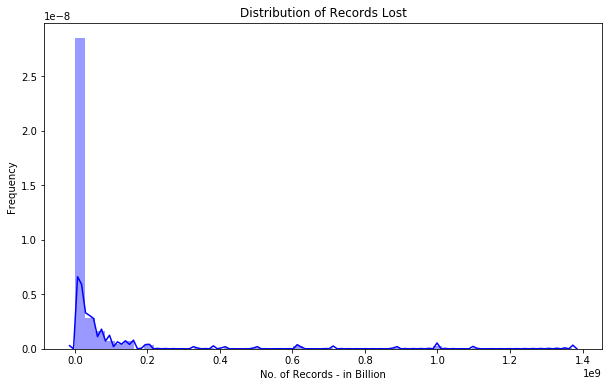

In [39]:
# Distribution of 'records lost' 
def plot_distribution(inp):
    plt.figure(figsize=(10,6))
    ax = sns.distplot(inp, color = 'Blue')
    return plt.figure

plot_distribution(df.records_lost.to_numpy())
plt.title('Distribution of Records Lost')
plt.xlabel('No. of Records - in Billion')
plt.ylabel('Frequency');

''

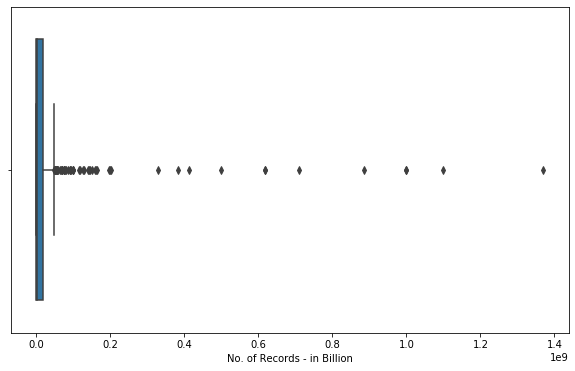

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(df.records_lost)
plt.xlabel('No. of Records - in Billion')
;

In [41]:
df.query('records_lost > 200000000').shape

(13, 10)

In this case, the data is right skewed. Most of the breaches have occured where records lost are at the most 0.2 Billion.

## Part C: Data Mining and Visualization

In [42]:
df.head()

,entity,records_lost,year,story,sector,method,data_sensitivity,source_name,month,temp_sec
1,US Customs and Border Protection,100000,2019,June 2019. Photos of travellers' faces and lic...,government,hacked,SSN/Personal details,Washington Post,6,None
2,Click2Gov,300000,2018,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,Credit card information,Fortune,12,None
3,SingHealth,1500000,2018,July 2018. Hackers stole personal details of 1...,healthcare,hacked,Health & other personal records,Straits Times,7,None
4,Quest Diagnostics,11900000,2019,June 2019. One of the biggest blood testing pr...,healthcare,poor security,Health & other personal records,NBC News,6,None
5,Australian National University,200000,2019,June 2019. A hacker accessed personal informat...,academic,hacked,Health & other personal records,Guardian,6,None


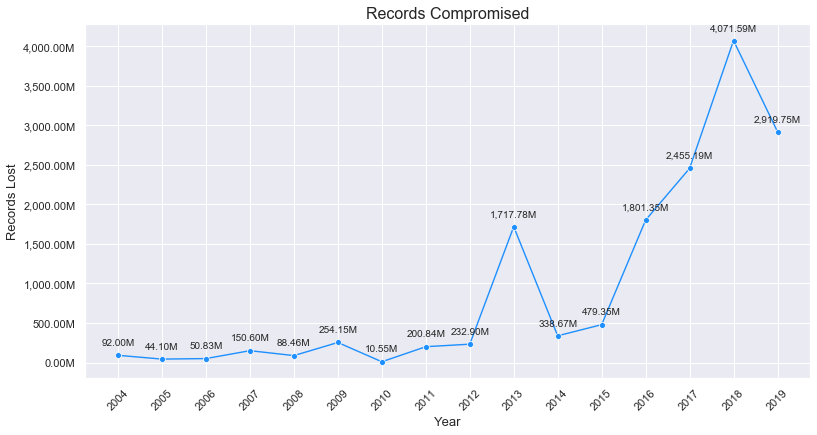

In [53]:
# Calculating sum of records_lost by period
df_records = df.groupby(['year'])['records_lost'].sum().reset_index()

plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2, rc={"lines.linewidth":1.4});
g = sns.lineplot(x='year', y='records_lost', data= df_records, marker='o', color = 'dodgerblue')
g.set_title("Records Compromised", fontsize = 16)
g.set_xlabel("Year", fontsize = 13)
g.set_ylabel("Records Lost", fontsize = 13)
ylabels = ['{:,.2f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45, fontsize = 11)
plt.yticks(fontsize = 11)

# Adding Data Labels for y axis --- to get the Revenue in Millions
for x,y in zip(df_records['year'],df_records['records_lost']):

    label = '{:,.2f}'.format(y/1000000) + 'M'

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 10) # horizontal alignment can be left, right or center

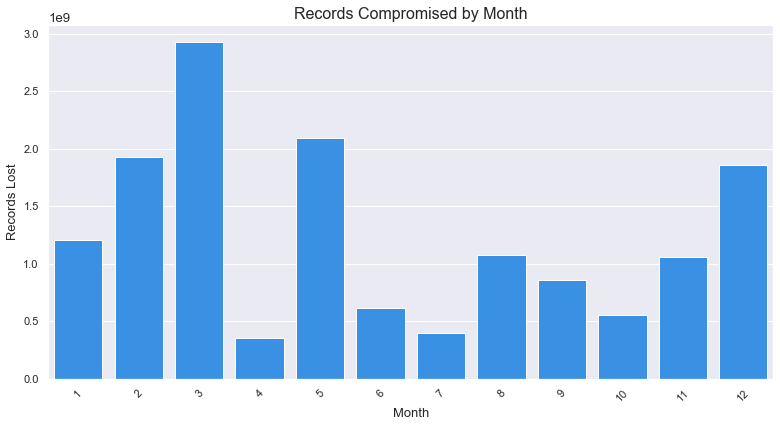

In [55]:
# Creating a new dataframe for records lost by month
df_month = df.groupby('month')['records_lost'].sum().reset_index().sort_values(by='month')

# visualizing the output
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_month['month']
y = y=df_month['records_lost']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Records Compromised by Month", fontsize = 16)
g.set_xlabel("Month", fontsize = 13)
g.set_ylabel("Records Lost", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

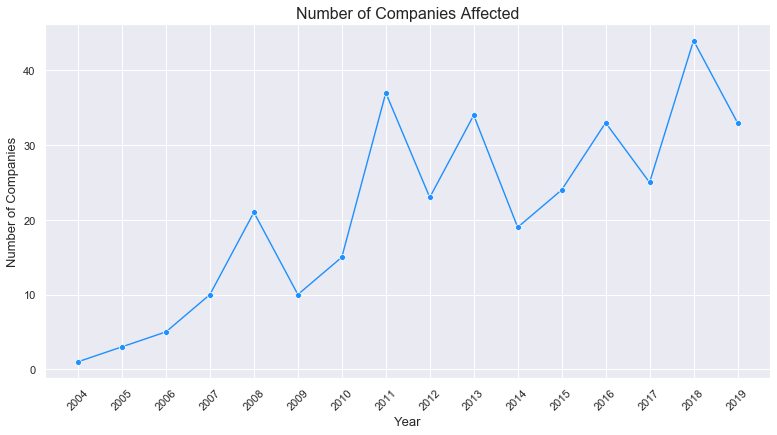

In [76]:
# Calculating number of companies affected by period
df_comp = df.groupby(['year'])['entity'].count().reset_index()

plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2, rc={"lines.linewidth":1.4});
g1 = sns.lineplot(x='year', y='entity', data= df_comp, marker='o', color = 'dodgerblue')
g1.set_title("Number of Companies Affected", fontsize = 16)
g1.set_xlabel("Year", fontsize = 13)
g1.set_ylabel("Number of Companies", fontsize = 13)
plt.xticks(rotation=45, fontsize = 11)
plt.yticks(fontsize = 11);

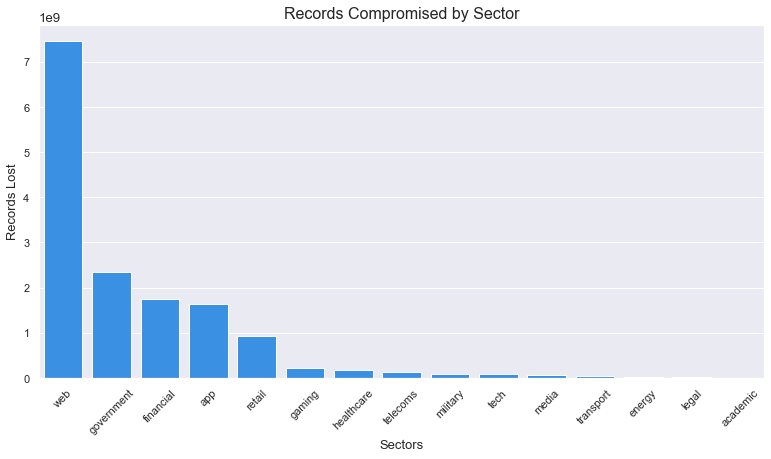

In [75]:
# Creating a new dataframe for records lost by sector
df_sec = df.groupby('sector')['records_lost'].sum().reset_index().sort_values(by='records_lost', ascending=False)

# visualizing the output
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_sec['sector']
y = y=df_sec['records_lost']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Records Compromised by Sector", fontsize = 16)
g.set_xlabel("Sectors", fontsize = 13)
g.set_ylabel("Records Lost", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

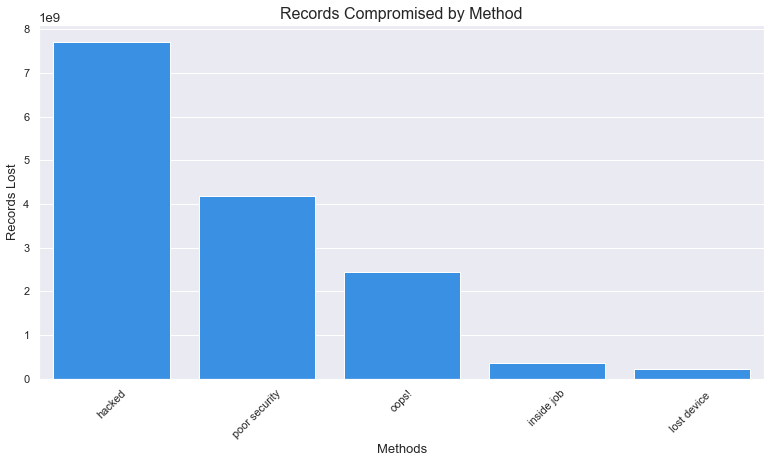

In [78]:
# What type of methods lead to more data loss

df_method = df.groupby('method')['records_lost'].sum().reset_index().sort_values(by='records_lost', ascending = False)

# visualizing the output
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_method['method']
y = y=df_method['records_lost']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Records Compromised by Method", fontsize = 16)
g.set_xlabel("Methods", fontsize = 13)
g.set_ylabel("Records Lost", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

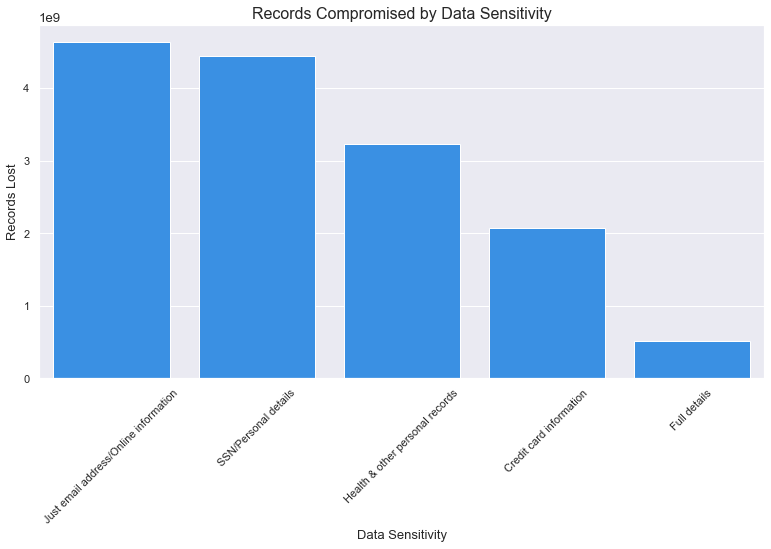

In [77]:
# What sort of data do hackers want
df_sens = df.groupby('data_sensitivity')['records_lost'].sum().reset_index().sort_values(by='records_lost', ascending = False)

# visualizing the output
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_sens['data_sensitivity']
y = y=df_sens['records_lost']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Records Compromised by Data Sensitivity", fontsize = 16)
g.set_xlabel("Data Sensitivity", fontsize = 13)
g.set_ylabel("Records Lost", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

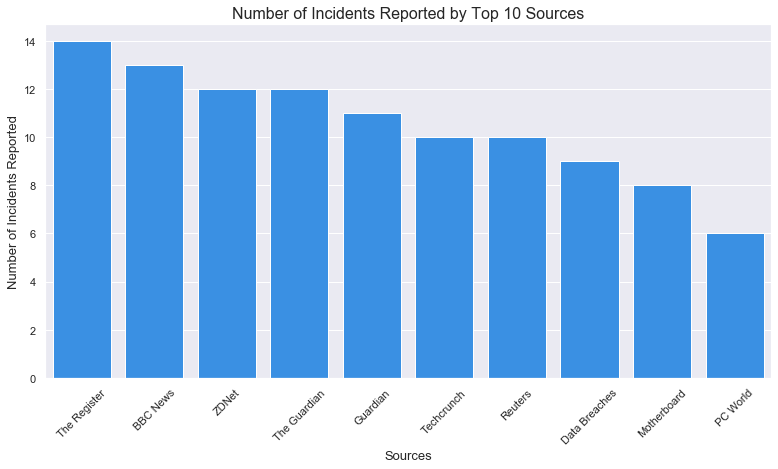

In [86]:
# Incidents reported by different sources
df_source = df.groupby('source_name')['entity'].count().reset_index().sort_values(by='entity', ascending = False).head(10)

# visualizing the output
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_source['source_name']
y = y=df_source['entity']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Number of Incidents Reported by Top 10 Sources", fontsize = 16)
g.set_xlabel("Sources", fontsize = 13)
g.set_ylabel("Number of Incidents Reported", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

## Insights
* From the yearly trend, we can see that the number of records lost have increased over time from 2004 – 2019 (~15Bn records lost)
* “Hacked” method has led to maximum data loss (52%) followed by “Poor Security” (28% ) and “Oops”(16%)
* Entities from “web” sector have been affected most where most of the records lost were most sensitive like “SSN/ Personal Details” 
* Entity “Aadhaar” has seen tremendous data loss of more than 2Bn records with maximum in 2018, followed by “Yahoo” (1.5Bn) and “River City Media” (1.4Bn)